<a href="https://colab.research.google.com/github/Ronan-Castro/Modelo-de-Validacao-sobre-Risco-de-Fogo-na-Regiao-de-Altamira/blob/main/Vers%C3%A3o_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
#FRP (Fire Radiative Power)

In [ ]:
def metrics_report(y, y_pred, dataset_name='valid'):
  mean_y = np.mean(y)
  mean_pred = np.mean(y_pred)

  rmse = round(math.sqrt(mean_squared_error(y, y_pred)), 2)
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  mape = mean_absolute_percentage_error(y_pred, y)
  report = pd.DataFrame({
    'metric': ['RMSE', 'MAE', 'R^2', 'MAPE', 'Avg. target', 'Avg. Prediction'],
    dataset_name: [rmse, mae, r2, mape, mean_y, mean_pred]
  })

  report[dataset_name] = report[dataset_name].round(2)
  return report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projeto Tera/Dados/DadosTotais_SemiTratados.csv')

In [ ]:
df.columns

Index(['Data', 'estado', 'municipio', 'bioma', 'diasemchuva', 'precipitacao',
       'riscofogo', 'latitude', 'longitude', 'frp', 'Hora (UTC)',
       'Temp. [Hora] (C)', 'Umi. (%)', 'Pressao (hPa)', 'Vel. Vento (m/s)',
       'Dir. Vento (m/s)', 'Nebulosidade (Decimos)', 'Insolacao (h)',
       'Temp. Max. [Diaria] (h)', 'Temp. Min. [Diaria] (h)',
       'Chuva [Diaria] (mm)'],
      dtype='object')

In [ ]:
#df['frprecip'] = df['frp'] * df['precipitacao']

In [ ]:
lista = list(df.columns)

In [ ]:
lista.remove('Hora (UTC)')
lista.remove('Data')
lista.remove('estado')
lista.remove('municipio')
lista.remove('bioma')

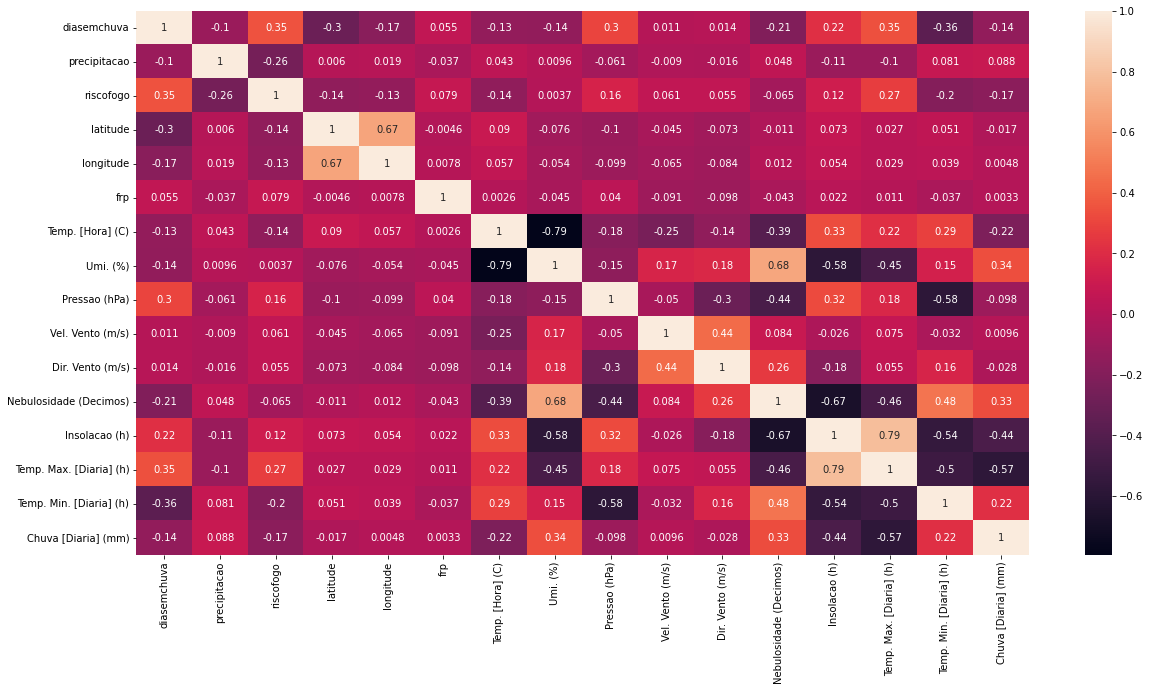

In [ ]:
plt.figure(figsize=(20, 10))
correlacao = df[lista].corr()
sns.heatmap(correlacao,annot=True)

In [ ]:
le = preprocessing.LabelEncoder()
df['city'] = le.fit_transform(df['municipio']) 
df['state'] = le.fit_transform(df['estado']) 

mediana1 = df['diasemchuva'].median()
df2 = df
df2['diasemchuva'] = np.where(df['diasemchuva'] <0, mediana1, df['diasemchuva'])


In [ ]:
X = df2[lista].drop('riscofogo', axis = 1)
y = df2['riscofogo']

In [ ]:
X, X_reality, y, y_reality = train_test_split(X, y, test_size=0.05, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
clf = RandomForestRegressor(random_state=42)
clf.fit(X, y)

RandomForestRegressor(random_state=42)

In [ ]:
y_baseline_pred = clf.predict(X_train)
baseline_report = metrics_report(y_train, y_baseline_pred, 'Treino')
baseline_report

,metric,Treino
0,RMSE,0.07
1,MAE,0.02
2,R^2,0.96
3,MAPE,0.08
4,Avg. target,0.76
5,Avg. Prediction,0.76


In [ ]:
y_baseline_test = clf.predict(X_test)

baseline_report = baseline_report.merge(metrics_report(y_test, y_baseline_test, 'Teste'), how='inner', on='metric')
baseline_report

,metric,Treino,Teste
0,RMSE,0.07,0.08
1,MAE,0.02,0.03
2,R^2,0.96,0.96
3,MAPE,0.08,0.09
4,Avg. target,0.76,0.75
5,Avg. Prediction,0.76,0.75


In [ ]:
y_baseline_valid = clf.predict(X_valid)

baseline_report = baseline_report.merge(metrics_report(y_valid, y_baseline_valid, 'Validação'), how='inner', on='metric')
baseline_report

,metric,Treino,Teste,Validação
0,RMSE,0.07,0.08,0.10
1,MAE,0.02,0.03,0.03
2,R^2,0.96,0.96,0.93
3,MAPE,0.08,0.09,0.09
4,Avg. target,0.76,0.75,0.77
5,Avg. Prediction,0.76,0.75,0.77


In [ ]:
y_baseline_reality = clf.predict(X_reality)

baseline_report = baseline_report.merge(metrics_report(y_reality, y_baseline_reality, 'Realidade'), how='inner', on='metric')
baseline_report

,metric,Treino,Teste,Validação,Realidade
0,RMSE,0.07,0.08,0.10,0.12
1,MAE,0.02,0.03,0.03,0.06
2,R^2,0.96,0.96,0.93,0.85
3,MAPE,0.08,0.09,0.09,0.18
4,Avg. target,0.76,0.75,0.77,0.75
5,Avg. Prediction,0.76,0.75,0.77,0.75
